#Analisando os dados de Venda de uma loja de Chocolates

In [ ]:
#imports
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns

choco = pd.read_csv('chocolura.csv')

In [ ]:
#Criando os comparativos e jogando numa função de comparação
choco['aumento'] = choco['vendas'].diff()
choco['aceleracao'] = choco['aumento'].diff()

def plot_comparar(x,y1,y2,y3,dataset, titulo):

  #Gráfico 1
  plt.figure(figsize=(25,12))
  grafico = plt.subplot(3,1,1)
  grafico.set_title(titulo, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  
  #Gráfico 2
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)

  #Gráfico 3
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)

plot_comparar('mes','vendas', 'aceleracao', 'aumento', choco, 'Análise de Vendas da Chocolateria 2017/18')

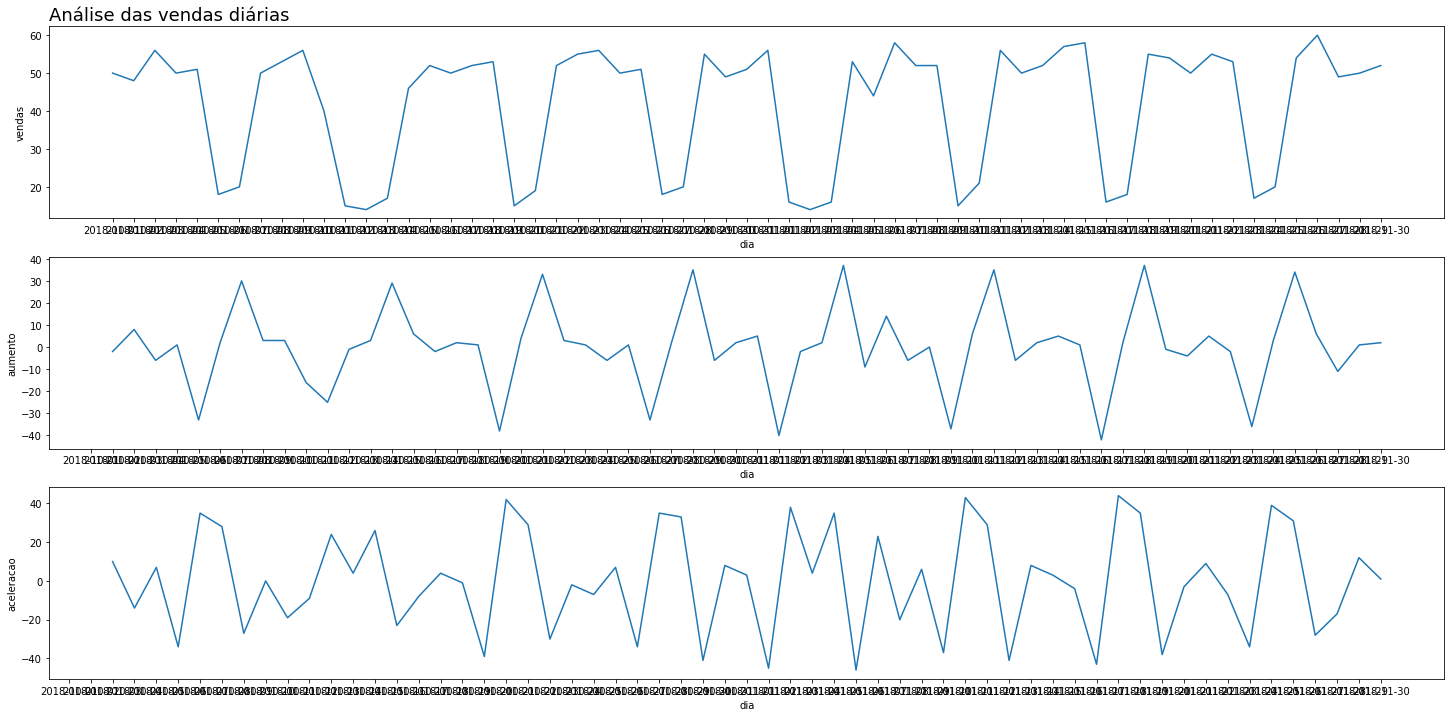

In [69]:
#Vsualizando as vendas diárias
vendasPdia = pd.read_csv('vendas_por_dia.csv')

vendasPdia['aumento'] = vendasPdia['vendas'].diff()
vendasPdia['aceleracao'] = vendasPdia['aumento'].diff()

plot_comparar('dia', 'vendas', 'aumento', 'aceleracao', vendasPdia, 'Análise das vendas diárias')

In [90]:
#Investigando as Sazonalidades
vendasPdia['diaDaSemana'] = vendasPdia['dia'].dt.day_name()

#Agrupando os dias(Média das vendas em cada dia da Semana)
vendasSemanais = vendasPdia.groupby('diaDaSemana')['vendas','aumento','aceleracao'].mean().round(2)
vendasSemanais

<ipython-input-90-6f3d4f9f9939>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendasSemanais = vendasPdia.groupby('diaDaSemana')['vendas','aumento','aceleracao'].mean().round(2)


,vendas,aumento,aceleracao
diaDaSemana,,,
Friday,44.56,-6.78,-5.00
Monday,52.33,33.75,30.75
Saturday,15.88,-27.75,-19.88
Sunday,18.88,3.00,30.75
Thursday,51.33,-1.78,-3.22
Tuesday,51.67,-0.67,-34.25
Wednesday,53.11,1.44,2.11
